# Convergence tutorial

This tutorial shows you how to process the calcualtions performed after using the `surfaxe.generation` module.
In general, it should help you make decisions about further calculations you may wish to beform on your slabs. 
It includes:

- Parsing raw calculation files to get summary data. 
- Collecting structures to compare with initial structures.
- Plotting surface energy as a function of slab and vacuum thickness.
- Plotting calcualtion time as a function of slab and vacuum thickness.

This example is based on calculations run using VASP. 

Assuming the convergence testing folders were made with `surfaxe` they can easily be parsed to extract:

- DFT total energy
- DFT total energy per atom
- surface energies (Boettger, Fiorentini-Methfessel)
- calculation time elapsed 
- vacuum potential and the average gradient of planar potential in vacuum 

for each slab/vacuum thickness/index combination.

In [1]:
# Import from relevant surfaxe modules 
from surfaxe.convergence import parse_energies, parse_structures
from surfaxe.io import plot_enatom, plot_surfen

# Import pandas and matplotlib, set figure size 
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8.0,7.0)
mpl.rcParams.update({'font.size': 10})

# Misc imports
from pathlib import Path 

# Ignore some specific benign warnings 
import warnings
warnings.filterwarnings("ignore", message='Float overflow')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

## Parsing calculation folders

By default, `parse_energies` looks in the current working directory, but the relative path to the folders can also be specified. It searches through root for folders named `slab_vacuum_index`, following the name convention from the `generation` module. 

In [2]:
# Set path to example data 
path_to_conv_data = Path.cwd().parents[1].joinpath('example_data/convergence/Y2Ti2S2O5')

Miller index and DFT total energy per atom (from the bulk calculation) must be supplied to the function. By default, the parsed data is automatically written to a `hkl_data.csv` file in the local directory. Here we set `save_csv=False` and instead get a dataframe.

In [3]:
parse_energies(hkl=(0,0,1), 
               bulk_per_atom=-8.83099767,
               path_to_fols='{}/001'.format(str(path_to_conv_data)), 
               plt_surfen=False, verbose=True, save_csv=False)

/Users/katarinabrlec/Documents/PhD/surfaxe/example_data/convergence/Y2Ti2S2O5/001 20_30_15
/Users/katarinabrlec/Documents/PhD/surfaxe/example_data/convergence/Y2Ti2S2O5/001 20_20_15
/Users/katarinabrlec/Documents/PhD/surfaxe/example_data/convergence/Y2Ti2S2O5/001 20_50_15
/Users/katarinabrlec/Documents/PhD/surfaxe/example_data/convergence/Y2Ti2S2O5/001 30_20_15
/Users/katarinabrlec/Documents/PhD/surfaxe/example_data/convergence/Y2Ti2S2O5/001 30_30_15
/Users/katarinabrlec/Documents/PhD/surfaxe/example_data/convergence/Y2Ti2S2O5/001 30_50_15


,hkl_string,hkl_tuple,slab_thickness,vac_thickness,slab_index,atoms,area,bandgap,slab_energy,slab_per_atom,time_taken,surface_energy,surface_energy_fm,surface_energy_boettger
1,001,"(0, 0, 1)",20,20,15,22,14.213073,0.4830,-193.551882,-8.797813,135.569,0.411440,0.416144,0.416144
3,001,"(0, 0, 1)",30,20,15,44,14.213073,0.4814,-387.842177,-8.814595,293.511,0.406737,0.416144,NaN
0,001,"(0, 0, 1)",20,30,15,22,14.213073,0.4824,-193.550995,-8.797772,168.599,0.411941,0.417013,0.417013
4,001,"(0, 0, 1)",30,30,15,44,14.213073,0.4825,-387.841944,-8.814590,354.419,0.406868,0.417013,NaN
2,001,"(0, 0, 1)",20,50,15,22,14.213073,0.4828,-193.551429,-8.797792,199.200,0.411696,0.416804,0.416804
5,001,"(0, 0, 1)",30,50,15,44,14.213073,0.4831,-387.842443,-8.814601,473.562,0.406587,0.416804,NaN


We also set `verbose=True` to print out the included directories.

The `surface_enregy_fm` column corresponds to the surface energies calculated with the [Fiorentini-Methfessel](https://doi.org/10.1088/0953-8984/8/36/005) method, while `surface_energy_boettger` corresponds to the [Boettger method](https://doi.org/10.1103/PhysRevB.49.16798). All surface energies are in J/m2, divide by 16.02 for eV/Å2.

If we don't want a pandas dataframe, we can just save the data as a csv file in the current directory:

In [8]:
parse_energies(hkl=(0,0,1), 
           bulk_per_atom=-8.83099767,
           path_to_fols='{}/001'.format(str(path_to_conv_data)),
           plt_surfen=False)

## Plotting

Based on the data obtained with `parse_fols`, functions from `surfaxe.io` can be used to make surface energy and energy per atom heatmaps or line plots. Both `plot_surfen` and `plot_enatom` can account for different terminations (different slab indices) and plot in separete figures. These convergence plots are useful as they allow for quick visual comparison to note at what slab and vacuum thickness the energies converge.

**Note: plots can be produced directly from the `parse_fols` function by setting `plot_surfen` to `True` (try it above!)**

The surface energies are plotted using `plot_surfen` as shown here. We will use a `.csv` file of the same format as generated above, but containing more rows (more slab and vacuum thicknesses). 

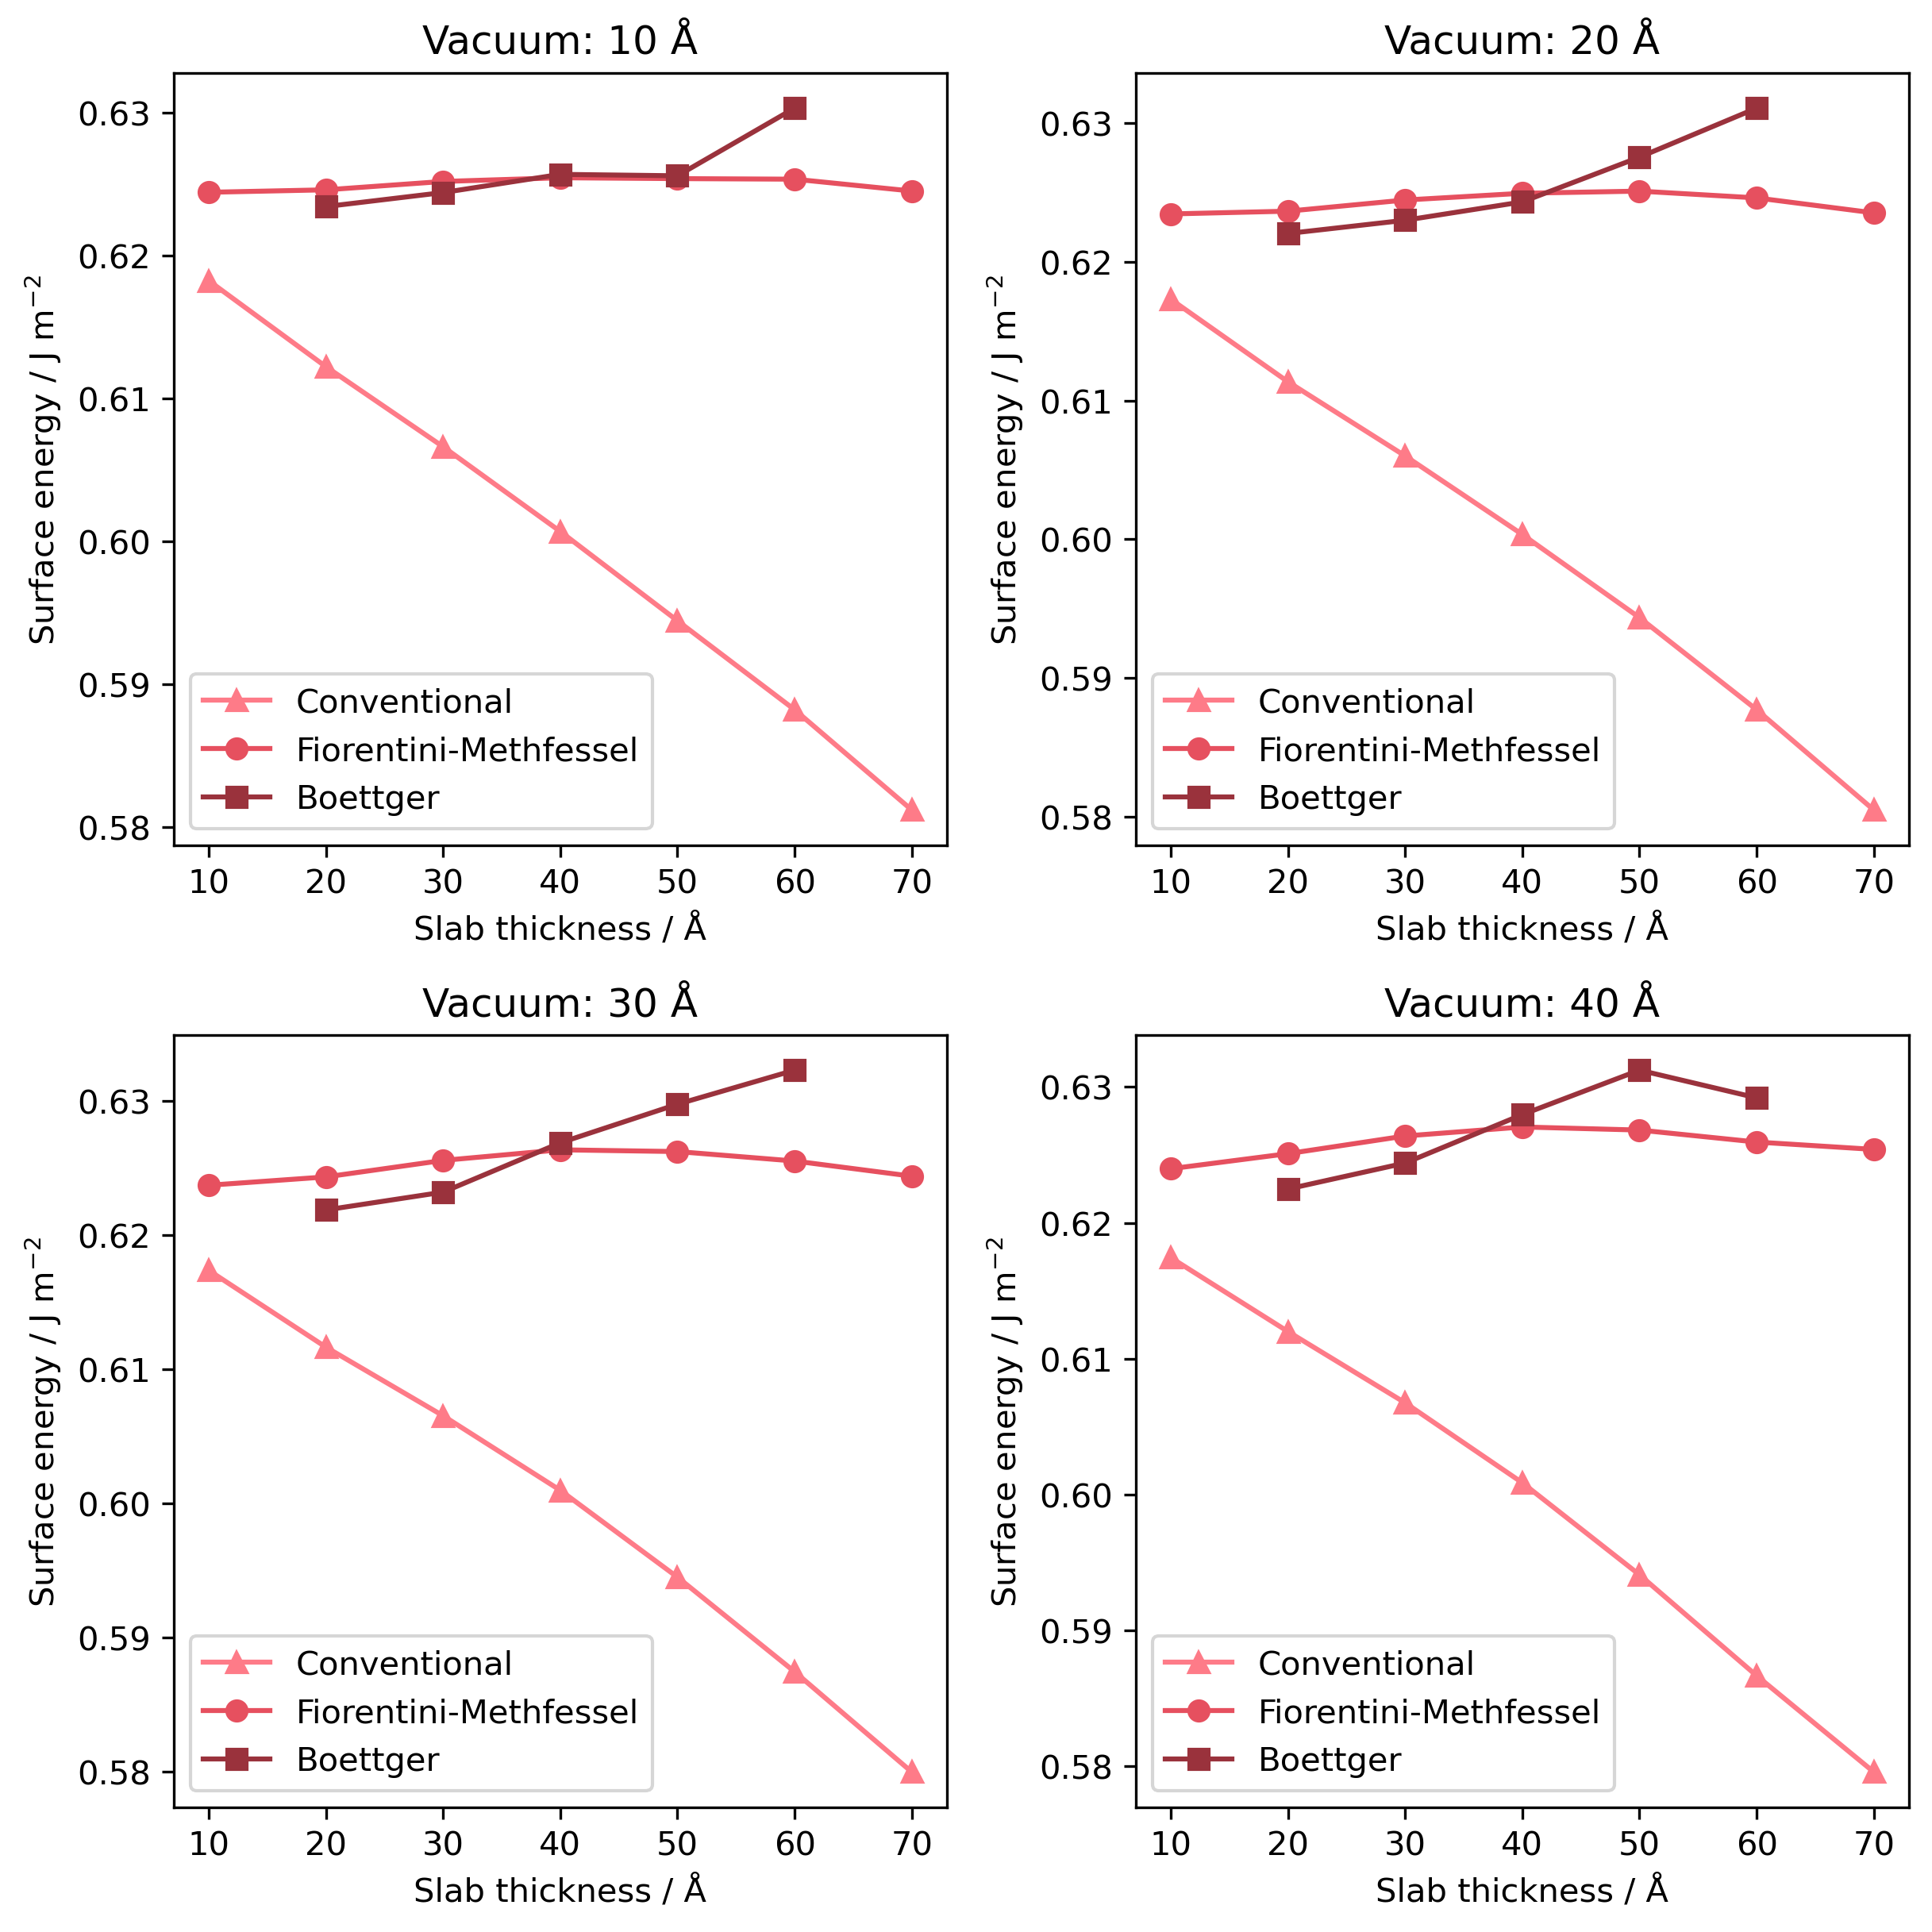

In [3]:
# Read the csv in as a pandas dataframe 
df = pd.read_csv(str(path_to_conv_data.joinpath('110_data.csv')))
df2 = pd.read_csv(str(path_to_conv_data.joinpath('010_data.csv')))
# Plot the data and save as a png file
plot_surfen(df2, plt_fname='010_surface_energy.png', width=8, height=8)

In this case, we are comparing the convergence of surface energy when the slab is allowed to relax vs a singleshot (static) calculation. 

The energies per atom can be plotted using `plot_enatom`. This time, both indices (relaxed and unrelaxed) are plotted in the same figure.

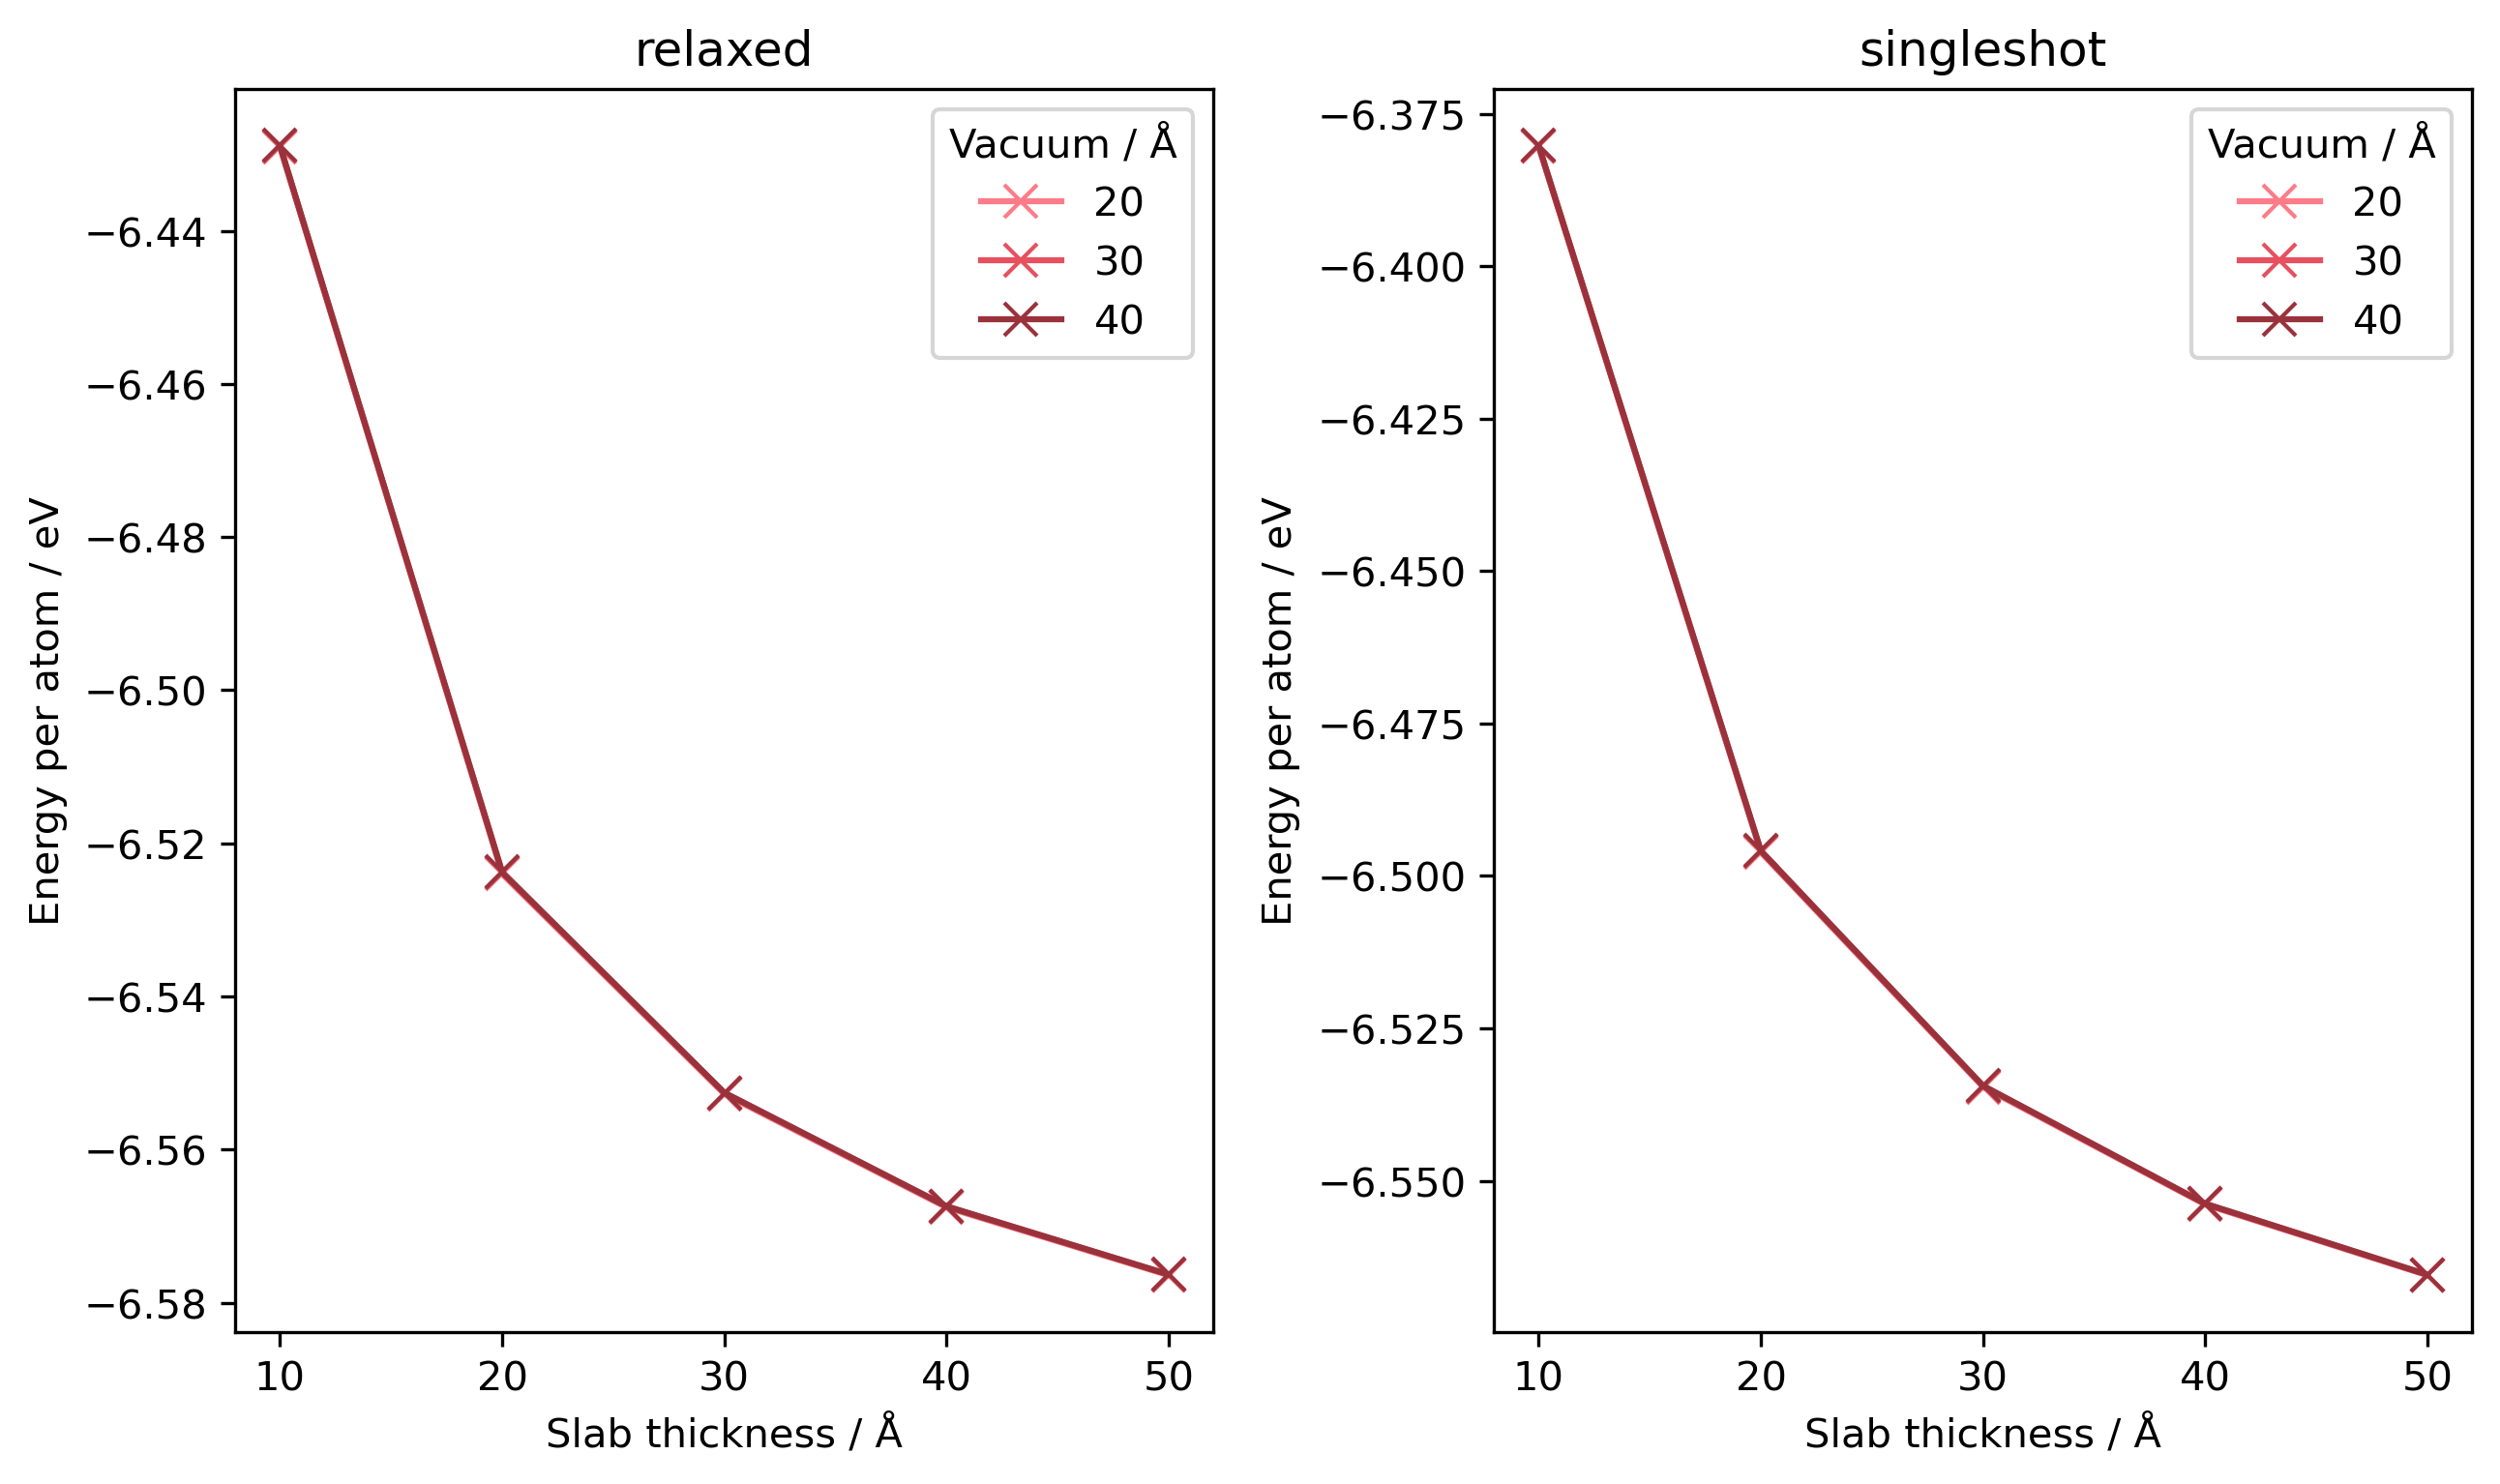

In [4]:
plot_enatom(df, plt_fname='110_energy_per_atom.png', width=8.5)

For plotting directly from `parse_fols` using `plot_surfen` keyword arguments can be passed to both plotting functions.

If multiple terminations are present and a `plt_fname` is specified in `plot_surfen`, the function will overrule that and name the files or `surface_energy_index.png`.

## Parsing core and vacuum electron energy levels

<div class="alert alert-info">

**Note:** This example requires some large output files that are not kept in this repository. It will not run as-is or on Binder, but you can download the needed files from [this zenodo repository](https://doi.org/10.5281/zenodo.4534434) and specify the path in the function e.g. path_to_fols=/Path/to/data/MgO if you want to run this example yourself.

</div>


In this example, we parse the output file containing the local electrostatic potential (LOCPOT in VASP) to determine the vacuum energy level, and use pymatgen to determine a core reference energy level. The latter requires us to pass some extra arguments, including the identity of the atom we want to use as a reference core energy level, and its nearest neighbour environemnt. See [this paper](https://pubs.acs.org/doi/abs/10.1021/ar400115x) by Walsh and Butler for further reading on this approach. 

In [3]:
df_MgO = parse_energies(hkl=(1,1,0), 
           bulk_per_atom=-6.22930653375,
           path_to_fols='/Users/Dan/Downloads/MgO/',
           plt_surfen=False, 
           parse_vacuum=True, parse_core_energy=True,
           save_csv=False,
           core_atom='O', bulk_nn=['Mg', 'Mg', 'Mg', 'Mg', 'Mg', 'Mg'])

/Users/dan/src/surfaxe/surfaxe/convergence.py:105: UserWarning: Determining core energies for 32 slabs may be slow. Running on 16 cores.
  multiprocessing.cpu_count()))


We now have additional columns in the dataframe for vacuum potential and core energy.

In [7]:
df_MgO.head()

,hkl_string,hkl_tuple,slab_thickness,vac_thickness,slab_index,atoms,area,bandgap,slab_energy,slab_per_atom,time_taken,surface_energy,vacuum_potential,core_energy
0,110,"(1, 1, 0)",20,20,1,28,12.566934,2.1818,-170.779763,-6.099277,43.941,2.320611,4.133,-504.9809
1,110,"(1, 1, 0)",60,30,1,84,12.566934,2.1678,-519.635784,-6.186140,302.397,2.311143,5.424,-503.6971
2,110,"(1, 1, 0)",40,30,1,56,12.566934,2.1856,-345.207074,-6.164412,154.056,2.316323,4.626,-504.4939
3,110,"(1, 1, 0)",80,40,1,108,12.566934,2.1855,-669.147701,-6.195812,488.268,2.305686,5.436,-503.6802
4,110,"(1, 1, 0)",40,20,1,56,12.566934,2.1860,-345.208068,-6.164430,124.405,2.315689,5.504,-503.6080


This data can be used, along with the same values extracted from a bulk calculation, to determine ionisation potential (IP) and electron affinity (EA). These in turn can be used to produce band alignment plots. IP and EA are calculated as:

$IP = (E_{vac} - E_{core,slab}) - (E_{VBM, bulk} - E_{core,bulk})$

$EA = IP - E_{g,slab}$

Where $E_{vac}$ and $E_{core}$ are the vacuum and core energy levels. See [this paper](https://doi.org/10.1063/1.121249) by Wei and Zunger for the background. 

The [Macrodensity](https://github.com/WMD-group/MacroDensity) and [bapt](https://github.com/utf/bapt) packages are useful tools for this application. 

## Parsing structures

The convergence module can also collate the structures and relevant metadata to a json file that contains the same information as the json metadata from the `surfaxe.generation.generate_slabs` function.

In [4]:
parse_structures(hkl=(0,0,1), structure_file='POSCAR', 
    path_to_fols='{}/001'.format(path_to_conv_data), bond=['Ti', 'O'])

By default the function will collect the `CONTCAR` files as the structures should have been relaxed in convergence testing. The json file is written to current working directory by default but a different location and filename can be supplied.

The function can also analyse the bonding environment using keywords `bonds` and `nn_method`, same as in `surfaxe.analysis.bond_analysis`. Multiple bonds can be analysed at same time, provided they are supplied as a list of lists, e.g. `[['Ti', 'O'], ['Y', 'O']]`. In this case the csv filename cannot be modified and will revert to `bond_analysis_TiO.csv`, for example. The csv's are saved to the location of `path_to_fols`.